**Iris clustering**

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# uploading the dataset
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'"sepal.length","sepal.width","petal.length","petal.width","variety"\n5.1,3.5,1.4,.2,"Setosa"\n4.9,3,1.4,.2,"Setosa"\n4.7,3.2,1.3,.2,"Setosa"\n4.6,3.1,1.5,.2,"Setosa"\n5,3.6,1.4,.2,"Setosa"\n5.4,3.9,1.7,.4,"Setosa"\n4.6,3.4,1.4,.3,"Setosa"\n5,3.4,1.5,.2,"Setosa"\n4.4,2.9,1.4,.2,"Setosa"\n4.9,3.1,1.5,.1,"Setosa"\n5.4,3.7,1.5,.2,"Setosa"\n4.8,3.4,1.6,.2,"Setosa"\n4.8,3,1.4,.1,"Setosa"\n4.3,3,1.1,.1,"Setosa"\n5.8,4,1.2,.2,"Setosa"\n5.7,4.4,1.5,.4,"Setosa"\n5.4,3.9,1.3,.4,"Setosa"\n5.1,3.5,1.4,.3,"Setosa"\n5.7,3.8,1.7,.3,"Setosa"\n5.1,3.8,1.5,.3,"Setosa"\n5.4,3.4,1.7,.2,"Setosa"\n5.1,3.7,1.5,.4,"Setosa"\n4.6,3.6,1,.2,"Setosa"\n5.1,3.3,1.7,.5,"Setosa"\n4.8,3.4,1.9,.2,"Setosa"\n5,3,1.6,.2,"Setosa"\n5,3.4,1.6,.4,"Setosa"\n5.2,3.5,1.5,.2,"Setosa"\n5.2,3.4,1.4,.2,"Setosa"\n4.7,3.2,1.6,.2,"Setosa"\n4.8,3.1,1.6,.2,"Setosa"\n5.4,3.4,1.5,.4,"Setosa"\n5.2,4.1,1.5,.1,"Setosa"\n5.5,4.2,1.4,.2,"Setosa"\n4.9,3.1,1.5,.2,"Setosa"\n5,3.2,1.2,.2,"Setosa"\n5.5,3.5,1.3,.2,"Setosa"\n4.9,3.6,1.4,.

In [ ]:
!ls

iris.csv  sample_data


In [ ]:
iris = pd.read_csv('iris.csv') #storing the data frame to the variable 'iris'

In [ ]:
type(iris)

pandas.core.frame.DataFrame

In [ ]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.shape

(150, 5)

Remove the label from the dataset. That is, Variety column

In [ ]:
iris_clustering = iris.drop(columns=['variety'])

In [ ]:
iris.drop?

In [ ]:
iris_clustering.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Selecting the features - sepal width and petal width

In [ ]:
X = iris_clustering.iloc[:,[1,3]].values

In [ ]:
print(X)

**Choosing the number of Clusters**


In [ ]:
# Elbow method to determine the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  #append the wcss values to the list. (kmeans.inertia_ returns the wcss value for an initiaalized cluster)
  wcss.append(kmeans.inertia_)

**Plotting the elbow graph to find optimum number of cluster**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


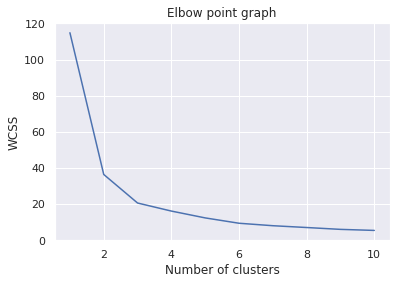

In [ ]:
# elbow graph
import seaborn as sns
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Thus the optimum number of cluster is 3

In [ ]:
# initializing the K-Means with optimum number of cluster(3)
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state = 0)
# fitting the datapoints to the K-means function and returning a label for each data points
y = kmeans.fit_predict(X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


**Visualizing the Clusters**

In [ ]:
plt.scatter?

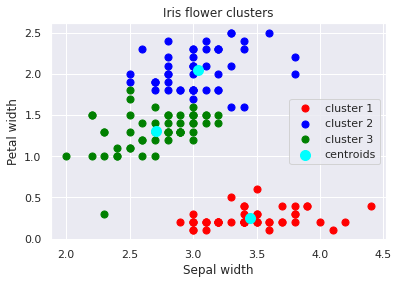

In [ ]:
# scatter plot for (x,y) with label 0 as cluster 1 in color red
plt.scatter( X[y==0,0], X[y==0,1], s = 50, c = 'red', label = 'cluster 1')
# scatter plot for (x,y) with label 1 as cluster 2 in color blue
plt.scatter( X[y==1,0], X[y==1,1], s=50, c='blue', label='cluster 2')
# scatter plot for (x,y) with label 2 as cluster 3 in color green
plt.scatter( X[y==2,0], X[y==2,1], s=50, c='green', label = 'cluster 3')

#plotting the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label = 'centroids')

plt.title('Iris flower clusters')
plt.xlabel('Sepal width')
plt.ylabel('Petal width')
plt.legend()
plt.show()